In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 31.7 MB/s eta 0:00:00


In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 18.88 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-09-05 09:13:28--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.2, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20f

In [ ]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
#[출처] NameError: name 'Tagger' is not defined (부제: 왜 갑자기 잘되던 Mecab이 안되는 걸까?)|작성자 존이

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 5.0 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1231 sha256=bfcbcdccbcc3c1615d57eb982831ec9e50124bf64015dd121fad340959a7172e
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 r

In [ ]:
import numpy as np
import pandas as pd
import warnings # 경고 메시지 무시
warnings.filterwarnings(action='ignore')
# 한국어 형태소 분석기 중 성능이 가장 우수한 Mecab 사용
#!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/d9206305195583c08400cb2237c837cc42df2e65/scripts/mecab.sh)
from konlpy.tag import Mecab
mecab = Mecab()
from tqdm import tqdm # 작업 프로세스 시각화
import re # 문자열 처리를 위한 정규표현식 패키지
from gensim import corpora # 단어 빈도수 계산 패키지
import gensim # LDA 모델 활용 목적
import pyLDAvis.gensim_models # LDA 시각화용 패키지
from collections import Counter # 단어 등장 횟수 카운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [ ]:
dataset_raw1 = pd.read_csv('/content/drive/MyDrive/논문준비/toss.csv',encoding='cp949')
dataset_raw2 = pd.read_csv('/content/drive/MyDrive/논문준비/카카오뱅크특허.csv',encoding='cp949')
dataset_raw3 = pd.read_csv('/content/drive/MyDrive/논문준비/kbank.csv',encoding='cp949')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfs = [dataset_raw1, dataset_raw2, dataset_raw3]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[    Unnamed: 0  Application_No Application_Date   Applicant    Legal_State  \
 0            0    1.020140e+12       2014.05.15  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 1            1    1.020180e+12       2018.02.13  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 2            2    1.020200e+12       2020.04.13  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 3            3    1.020150e+12       2015.05.12  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 4            4    1.020170e+12       2017.08.31  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 5            5    1.020170e+12       2017.08.31  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 6            6    1.020170e+12       2017.08.31  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 7            7    1.020160e+12       2016.05.18  (주)비바리퍼블리카  등록 (권리 변동 있음)   
 8            8    1.020220e+12       2022.03.28  (주)비바리퍼블리카             등록   
 9            9    1.020210e+12       2021.02.02  (주)비바리퍼블리카             등록   
 10          10    1.020210e+12       2021.07.09  (주)비바리퍼블리카             공개   
 11          11    1.020210e+12       2021.07.09  (주

In [ ]:
dataset_raw = pd.concat(dfs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stopword_list = pd.read_excel('/content/drive/MyDrive/논문준비/stopword.xlsx')
stopword_list.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,stopword
1090,정보
1091,제공
1092,연계
1093,저장
1094,처리


In [ ]:
dataset_raw["Application_Date"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     2014.05.15
1     2018.02.13
2     2020.04.13
3     2015.05.12
4     2017.08.31
         ...    
13    2017.03.16
14    2017.04.18
15    2017.04.13
16    2016.07.06
17    2016.09.19
Name: Application_Date, Length: 101, dtype: object

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


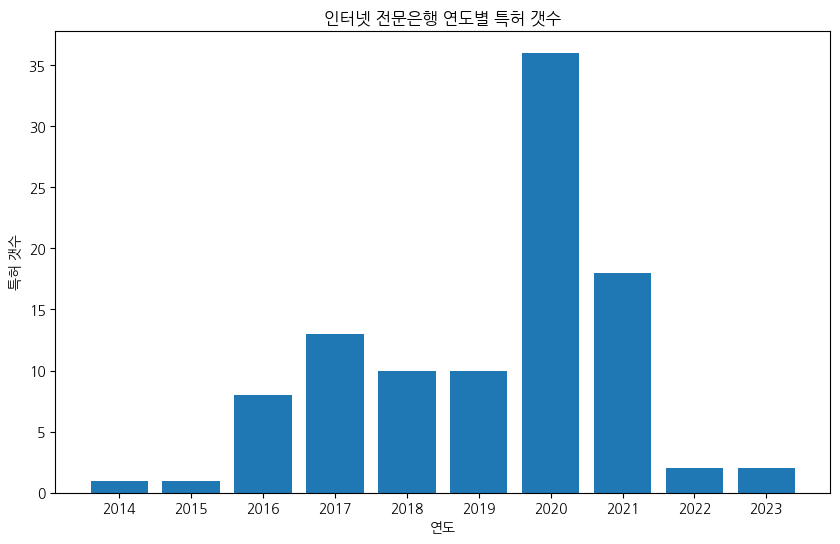

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_raw['Application_Date'] = pd.to_datetime(dataset_raw['Application_Date'], format='%Y.%m.%d')

# 연도별로 데이터 포인트 갯수 계산
yearly_counts = dataset_raw['Application_Date'].dt.year.value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.xlabel("연도")
plt.ylabel("특허 갯수")
plt.title("인터넷 전문은행 연도별 특허 갯수")
plt.xticks(yearly_counts.index)
plt.show()

In [ ]:
Patent_pos = dataset_raw['Summary_Text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     전자적 정보와 실제 자금을 분리하여 처리하는 금융 서비스 방법 및 시스템이 개시된다...
1     유저정보 스크래핑 방법 및 그 시스템이 개시된다.\n\n상기 유저정보 스크래핑 방법...
2     유저정보 스크래핑 방법 및 그 시스템이 개시된다.\n\n상기 유저정보 스크래핑 방법...
3     금융서비스 제공방법 및 이를 위한 시스템이 개시된다. 상기 금융서비스 제공방법은 금...
4     유저정보 스크래핑 방법 및 그 시스템이 개시된다.\n\n상기 유저정보 스크래핑 방법...
                            ...                        
13    본 발명의 일 실시예에 따른 서버 사이의 통신을 통한 전자 서명 방법은 제1 서버가...
14    본 발명의 일 실시예에 따른 블록 체인을 이용한 공동 계좌 관리 방법은 블록 체인 ...
15    디지털 콘텐츠 제공 서비스와 연계된 금융상품 운용 시스템 및 방법이 제시된다. 본 ...
16    본 발명은 모바일 뱅킹 서비스를 이용한 결제서비스를 제공하는 서버가 결제 처리를 하...
17    본 발명의 대출 금리 및 한도 변동형 금융상품 운용 시스템은 뱅킹 프로그램을 통해 ...
Name: Summary_Text, Length: 101, dtype: object

In [ ]:
df = pd.DataFrame(Patent_pos)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

review_tokenized_pos = list(map(lambda patent: mecab.nouns(patent), Patent_pos))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
review_tokenized_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['전자',
  '정보',
  '실제',
  '자금',
  '분리',
  '처리',
  '금융',
  '서비스',
  '방법',
  '시스템',
  '개시',
  '금융',
  '서비스',
  '시스템',
  '수행',
  '금융',
  '서비스',
  '방법',
  '사용',
  '은행',
  '계좌',
  '정보',
  '등록',
  '단계',
  '상기',
  '사용',
  '단말기',
  '송금',
  '대상자',
  '전화',
  '번호',
  '송금',
  '요청',
  '금액',
  '포함',
  '송금',
  '요청',
  '네트워크',
  '수신',
  '단계',
  '상기',
  '전화',
  '번호',
  '이용',
  '상기',
  '송금',
  '대상자',
  '단말기',
  '계좌',
  '번호',
  '입력',
  '링크',
  '제공',
  '단계',
  '상기',
  '링크',
  '입력',
  '계좌',
  '번호',
  '상기',
  '송금',
  '요청',
  '금액',
  '포함',
  '입금',
  '요청',
  '자금',
  '관리',
  '시스템',
  '전송',
  '단계',
  '상기',
  '송금',
  '요청',
  '금액',
  '기반',
  '출금',
  '요청',
  '상기',
  '자금',
  '관리',
  '시스템',
  '전송',
  '단계',
  '포함',
  '수',
  '이때',
  '상기',
  '자금',
  '관리',
  '시스템',
  '상기',
  '입금',
  '요청',
  '상기',
  '계좌',
  '번호',
  '상기',
  '송금',
  '요청',
  '금액',
  '입금',
  '상기',
  '출금',
  '요청',
  '상기',
  '사용',
  '은행',
  '계좌',
  '정산',
  '금액',
  '출금',
  '것',
  '특징',
  '수'],
 ['유저',
  '정보',
  '래핑',
  '방법',
  '시스템',
  '개시',
  '유저',
  '정보',
  '

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

documents_as_strings = [' '.join(doc) for doc in review_tokenized_pos]

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(documents_as_strings)

words = tfidf_vectorizer.get_feature_names_out()

tfidf_matrix_array = tfidf_matrix.toarray()

threshold = 0.1

stop_words = []

for i, word in enumerate(words):
    tfidf_values = tfidf_matrix_array[:, i]
    if all(tfidf_value < threshold for tfidf_value in tfidf_values):
        stop_words.append(word)

print(f"설정한 임계값 {threshold} 이하인 불용어 목록:")
print(stop_words)

설정한 임계값 0.1 이하인 불용어 목록:
['가변', '가중', '감액', '강도', '강화', '개시', '계산', '고금리', '고립', '고정', '공유', '과정', '구매', '구체', '그래픽', '근로자', '금계', '금부', '금주', '기능', '기술', '기준치', '내국', '내용', '너비', '단기', '단어', '달성', '대별', '도과', '동안', '드래그', '라벨', '로드', '로직', '리부', '리스크', '마련', '만족도', '메뉴', '메소드', '면유', '명의', '모계', '목표치', '문제', '문턱', '물리', '미각', '바코드', '반영', '방법', '방지', '방향', '범위', '베이스', '변화', '보안', '복제', '부담', '부액', '부여', '부호화', '분야', '분절', '불안감', '브라우저', '비밀', '비용', '사도', '사업', '삭제', '생년월일', '서류', '선별', '설치', '성별', '성분', '성시', '세션', '소모', '소정', '손실', '송금인', '송수신', '스케줄', '시점', '신청', '실시', '암호', '업데이트', '여기', '오류', '오프', '왕복', '용량', '우선', '워드', '유무', '유출', '이내', '이때', '이외', '이용한', '이후', '일별', '일정', '일치', '임의', '입부', '입출금', '자릿수', '자산', '자신', '자연어', '자유', '자의', '작업', '재생', '저장', '전부', '전이', '절부', '접촉', '정기', '정부', '정산', '제로', '제어', '제휴', '조작', '족도', '종류', '좌와', '주기', '증액', '지역', '직관', '진열', '진행', '초과', '초기', '촉각', '촬영', '최대', '최대한도', '최종', '추가', '출금액', '출부', '키워드', '탑재', '텍스트', '통신망', '통신사', '특성', '파악', 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix_array = tfidf_matrix.toarray()
words = tfidf_vectorizer.get_feature_names_out()

top_50_indices = np.argsort(-tfidf_matrix_array.sum(axis=0))[:20]

top_50_words = [words[i] for i in top_50_indices]
top_50_tfidf_values = [tfidf_matrix_array[:, i].sum() for i in top_50_indices]

for word, tfidf_value in zip(top_50_words, top_50_tfidf_values):
    print(f"{word}: {tfidf_value}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NotFittedError: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

tf_matrix = count_vectorizer.fit_transform(documents_as_strings)

words = count_vectorizer.get_feature_names_out()

tf_matrix_array = tf_matrix.toarray()
top_20_tf_indices = np.argsort(-tf_matrix_array.sum(axis=0))[:20]

top_20_tf_words = [words[i] for i in top_20_tf_indices]
top_20_tf_values = [tf_matrix_array[:, i].sum() for i in top_20_tf_indices]

for word, tf_value in zip(top_20_tf_words, top_20_tf_values):
    print(f"{word}: {tf_value}")

상기: 604
단계: 305
정보: 300
포함: 178
서버: 177
사용: 165
계좌: 153
방법: 151
인증: 136
금융: 127
발명: 122
이용: 121
수신: 110
요청: 102
제공: 92
신분증: 89
거래: 84
서비스: 81
시스템: 71
입력: 71


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
s = ['단계', '정보', '제공', '연계', '저장', '처리', '상기', '리부', '매체', '선택', '항목', '출력', '장치', '디지털', '플랫', '이력']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop_words.extend(s)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop_words_df = pd.DataFrame({'stopword': stop_words})

stopword_list = pd.concat([stopword_list, stop_words_df], ignore_index=True)

print(stopword_list)

     stopword
0        가까스로
1          가량
2          가령
3          가민
4       가민커넥트
...       ...
1278       출력
1279       장치
1280      디지털
1281       플랫
1282       이력

[1283 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop_words_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,stopword
0,가변
1,가중
2,감액
3,강도
4,강화
...,...
183,출력
184,장치
185,디지털
186,플랫


In [ ]:
def remove_stopword(tokens):
    review_removed_stopword = []
    for token in tokens:
        if 1 < len(token):
            if token not in list(stopword_list['stopword']):
                review_removed_stopword.append(token)

    return review_removed_stopword


def print_topic_prop(topics, RATING):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('topic_prop.xlsx', index=True)

    display(topic_prop)

def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def remove_stopword(tokens):
    review_removed_stopword = []
    for token in tokens:
        if 1 < len(token):
            if token not in list(stopword_list['stopword']):
                review_removed_stopword.append(token)

    return review_removed_stopword

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
review_removed_stopword_pos = list(map(lambda tokens : remove_stopword(tokens), review_tokenized_pos))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def remove_stopwords(tokens, stopwords):
    return [token for token in tokens if token not in stopwords]

review_removed_stopword_pos = [remove_stopwords(tokens, stop_words) for tokens in review_removed_stopword_pos]

print(review_removed_stopword_pos)

[['자금', '분리', '계좌', '등록', '송금', '대상자', '전화', '송금', '송금', '네트워크', '수신', '전화', '송금', '대상자', '계좌', '링크', '링크', '계좌', '송금', '입금', '자금', '전송', '송금', '기반', '출금', '자금', '전송', '자금', '입금', '계좌', '송금', '입금', '출금', '계좌', '출금'], ['래핑', '래핑', '세트', '전화', '세트', '획득', '세트', '세트', '로그인', '필요', '인증', '인증', '인증', '계정', '로그인', '계정', '로그인', '래핑', '래핑'], ['래핑', '래핑', '기관', '계정', '로그인', '기관', '래핑', '래핑', '로그인', '로그인', '로그인', '필요', '인증', '인증', '인증', '계정', '로그인', '계정', '로그인', '기관', '래핑', '래핑'], ['인증', '계좌', '계좌', '수신', '수신', '계좌', '기초', '계좌', '상응', '인증', '인증', '상응', '판단', '상응', '판단', '계좌', '인증', '인증', '거래', '내역', '접근', '필요'], ['래핑', '래핑', '기관', '계정', '로그인', '기관', '래핑', '래핑', '로그인', '로그인', '로그인', '필요', '인증', '인증', '인증', '계정', '로그인', '계정', '로그인', '기관', '래핑', '래핑'], ['래핑', '래핑', '계좌', '계좌', '이름', '기초', '세트', '세트', '세트', '로그인', '필요', '인증', '인증', '인증', '계정', '로그인', '계정', '로그인', '계좌', '운영', '기관', '래핑', '래핑'], ['래핑', '래핑', '세트', '전화', '세트', '획득', '세트', '세트', '로그인', '필요', '인증', '인증', '인증', '계정', '로그인', '계정', '로그인', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = review_removed_stopword_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
document_lengths = []

for document in corpus:
    document_length = len(document)
    document_lengths.append(document_length)

total_corpus_length = sum(document_lengths)
average_document_length = total_corpus_length / len(corpus)
min_document_length = min(document_lengths)
max_document_length = max(document_lengths)

print("전체 코퍼스 길이: ", total_corpus_length)
print("평균 문서 길이: ", average_document_length)
print("가장 짧은 문서 길이: ", min_document_length)
print("가장 긴 문서 길이: ", max_document_length)

전체 코퍼스 길이:  4051
평균 문서 길이:  40.10891089108911
가장 짧은 문서 길이:  15
가장 긴 문서 길이:  81


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
review_removed_stopword_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['자금',
  '분리',
  '계좌',
  '등록',
  '송금',
  '대상자',
  '전화',
  '송금',
  '송금',
  '네트워크',
  '수신',
  '전화',
  '송금',
  '대상자',
  '계좌',
  '링크',
  '링크',
  '계좌',
  '송금',
  '입금',
  '자금',
  '전송',
  '송금',
  '기반',
  '출금',
  '자금',
  '전송',
  '자금',
  '입금',
  '계좌',
  '송금',
  '입금',
  '출금',
  '계좌',
  '출금'],
 ['래핑',
  '래핑',
  '세트',
  '전화',
  '세트',
  '획득',
  '세트',
  '세트',
  '로그인',
  '필요',
  '인증',
  '인증',
  '인증',
  '계정',
  '로그인',
  '계정',
  '로그인',
  '래핑',
  '래핑'],
 ['래핑',
  '래핑',
  '기관',
  '계정',
  '로그인',
  '기관',
  '래핑',
  '래핑',
  '로그인',
  '로그인',
  '로그인',
  '필요',
  '인증',
  '인증',
  '인증',
  '계정',
  '로그인',
  '계정',
  '로그인',
  '기관',
  '래핑',
  '래핑'],
 ['인증',
  '계좌',
  '계좌',
  '수신',
  '수신',
  '계좌',
  '기초',
  '계좌',
  '상응',
  '인증',
  '인증',
  '상응',
  '판단',
  '상응',
  '판단',
  '계좌',
  '인증',
  '인증',
  '거래',
  '내역',
  '접근',
  '필요'],
 ['래핑',
  '래핑',
  '기관',
  '계정',
  '로그인',
  '기관',
  '래핑',
  '래핑',
  '로그인',
  '로그인',
  '로그인',
  '필요',
  '인증',
  '인증',
  '인증',
  '계정',
  '로그인',
  '계정',
  '로그인',
  '기관',
  '래핑',
  '래핑'],
 ['래핑',
  '래핑',


In [ ]:
corpus = review_removed_stopword_pos

In [ ]:

document_lengths = []

for document in corpus:
    document_length = len(document)
    document_lengths.append(document_length)

total_corpus_length = sum(document_lengths)
average_document_length = total_corpus_length / len(corpus)
min_document_length = min(document_lengths)
max_document_length = max(document_lengths)

print("전체 코퍼스 길이: ", total_corpus_length)
print("평균 문서 길이: ", average_document_length)
print("가장 짧은 문서 길이: ", min_document_length)
print("가장 긴 문서 길이: ", max_document_length)

In [ ]:
import numpy as np
documents_as_strings = [' '.join(doc) for doc in review_removed_stopword_pos]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents_as_strings)

tfidf_matrix_array = tfidf_matrix.toarray()
words = tfidf_vectorizer.get_feature_names_out()

top_50_indices = np.argsort(-tfidf_matrix_array.sum(axis=0))[:20]

top_50_words = [words[i] for i in top_50_indices]
top_50_tfidf_values = [tfidf_matrix_array[:, i].sum() for i in top_50_indices]

for word, tfidf_value in zip(top_50_words, top_50_tfidf_values):
    print(f"{word}: {tfidf_value}")

인증: 7.597770770024185
계좌: 6.910509318662369
서버: 5.792930204915804
신분증: 5.621900319895356
거래: 4.726167876053079
이미지: 4.423535752281401
수신: 4.207367918682332
래핑: 3.777273538106006
신경망: 3.70815580339226
결제: 3.612514906240132
인식: 3.252321182796427
로그인: 2.942955431707996
이체: 2.893998908412791
판단: 2.675526921045554
추출: 2.6020417503896556
학습: 2.5173030308133226
대출: 2.495137996860278
계정: 2.3772971442238493
기초: 2.12848258653047
영역: 2.1241130870995586


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
review_removed_stopword_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['자금',
  '분리',
  '계좌',
  '등록',
  '송금',
  '대상자',
  '전화',
  '송금',
  '송금',
  '네트워크',
  '수신',
  '전화',
  '송금',
  '대상자',
  '계좌',
  '링크',
  '링크',
  '계좌',
  '송금',
  '입금',
  '자금',
  '전송',
  '송금',
  '기반',
  '출금',
  '자금',
  '전송',
  '자금',
  '입금',
  '계좌',
  '송금',
  '입금',
  '출금',
  '계좌',
  '출금'],
 ['래핑',
  '래핑',
  '세트',
  '전화',
  '세트',
  '획득',
  '세트',
  '세트',
  '로그인',
  '필요',
  '인증',
  '인증',
  '인증',
  '계정',
  '로그인',
  '계정',
  '로그인',
  '래핑',
  '래핑'],
 ['래핑',
  '래핑',
  '기관',
  '계정',
  '로그인',
  '기관',
  '래핑',
  '래핑',
  '로그인',
  '로그인',
  '로그인',
  '필요',
  '인증',
  '인증',
  '인증',
  '계정',
  '로그인',
  '계정',
  '로그인',
  '기관',
  '래핑',
  '래핑'],
 ['인증',
  '계좌',
  '계좌',
  '수신',
  '수신',
  '계좌',
  '기초',
  '계좌',
  '상응',
  '인증',
  '인증',
  '상응',
  '판단',
  '상응',
  '판단',
  '계좌',
  '인증',
  '인증',
  '거래',
  '내역',
  '접근',
  '필요'],
 ['래핑',
  '래핑',
  '기관',
  '계정',
  '로그인',
  '기관',
  '래핑',
  '래핑',
  '로그인',
  '로그인',
  '로그인',
  '필요',
  '인증',
  '인증',
  '인증',
  '계정',
  '로그인',
  '계정',
  '로그인',
  '기관',
  '래핑',
  '래핑'],
 ['래핑',
  '래핑',


In [ ]:
 from collections import Counter


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import itertools


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
review_tokenized_pos = [tuple(item) for item in review_tokenized_pos]
review_tokenized_pos_set = set(review_tokenized_pos)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

word_to_combine = '영업점'
word_to_combine1 = '블록체인'
combined_tokens = []

for sublist in review_removed_stopword_pos:
    i = 0
    combined_sublist = []
    while i < len(sublist):
        if i < len(sublist) - 1 and sublist[i] == '영업' and sublist[i + 1] == '점':
            combined_sublist.append(word_to_combine)
            i += 2
        if i < len(sublist) - 1 and sublist[i] == '블록' and sublist[i + 1] == '체인':
            combined_sublist.append(word_to_combine1)
            i += 2
        else:
            combined_sublist.append(sublist[i])
            i += 1
    combined_tokens.append(combined_sublist)

for sublist in combined_tokens:
    print(sublist)


['자금', '분리', '계좌', '등록', '송금', '대상자', '전화', '송금', '송금', '네트워크', '수신', '전화', '송금', '대상자', '계좌', '링크', '링크', '계좌', '송금', '입금', '자금', '전송', '송금', '기반', '출금', '자금', '전송', '자금', '입금', '계좌', '송금', '입금', '출금', '계좌', '출금']
['래핑', '래핑', '세트', '전화', '세트', '획득', '세트', '세트', '로그인', '필요', '인증', '인증', '인증', '계정', '로그인', '계정', '로그인', '래핑', '래핑']
['래핑', '래핑', '기관', '계정', '로그인', '기관', '래핑', '래핑', '로그인', '로그인', '로그인', '필요', '인증', '인증', '인증', '계정', '로그인', '계정', '로그인', '기관', '래핑', '래핑']
['인증', '계좌', '계좌', '수신', '수신', '계좌', '기초', '계좌', '상응', '인증', '인증', '상응', '판단', '상응', '판단', '계좌', '인증', '인증', '거래', '내역', '접근', '필요']
['래핑', '래핑', '기관', '계정', '로그인', '기관', '래핑', '래핑', '로그인', '로그인', '로그인', '필요', '인증', '인증', '인증', '계정', '로그인', '계정', '로그인', '기관', '래핑', '래핑']
['래핑', '래핑', '계좌', '계좌', '이름', '기초', '세트', '세트', '세트', '로그인', '필요', '인증', '인증', '인증', '계정', '로그인', '계정', '로그인', '계좌', '운영', '기관', '래핑', '래핑']
['래핑', '래핑', '세트', '전화', '세트', '획득', '세트', '세트', '로그인', '필요', '인증', '인증', '인증', '계정', '로그인', '계정', '로그인', '래핑', '래

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
review_removed_stopword_pos = combined_tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform([" ".join(doc) for doc in review_removed_stopword_pos])

network = nx.Graph()

list_of_words = []

for i in range(len(review_removed_stopword_pos)):
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    top_indices = tfidf_scores.argsort()[-5:][::-1]
    top_keywords = [tfidf_vectorizer.get_feature_names_out()[idx] for idx in top_indices]

    for keyword, score in zip(top_keywords, tfidf_scores[top_indices]):
        network.add_node(keyword, weight=score)
        list_of_words.append(keyword)  #


print(network.nodes())

for node in network.nodes():
    weight = network.nodes[node]["weight"]
    print(f"Node: {node}, Weight: {weight}")

print(list_of_words)


['송금', '자금', '출금', '계좌', '입금', '세트', '래핑', '로그인', '인증', '계정', '기관', '상응', '판단', '접근', '식별', '결제', '가입', '상점', '위치', '석부', '대행', '토큰', '서버', '클라이언트', '적금', '아이콘', '광고주', '횟수', '현황', '통화', '상담원', '영상', '이미지', '인식', '신경망', '학습', '객체', '검수', '에이전트', '인증서', '접속', '기기', '조회', '중개', '코드', '차원', '비식', '신분증', '진위', '추출', '위조', '활성', '모델', '갱신', '배포', '개인', '데이터베이스', '배경', '영역', '분할', '도용', '내역', '애니메이션', '트리거', '성립', '통장', '당일', '동작', '프로그램', '시작', '기준', '실시간', '연산', '이자', '경과', '거래', '디퍼', '로그', '수신', '원장', '변동', '기록', '납입', '센싱', '터치', '그룹', '패턴', '프로파일', '안면', '산출', '부정', '검출', '플래시', '획득', '품질', '해도', '변형', '외곽', '원본', '유사', '화도', '신분', '얼굴', '매칭', '단위', '홀로그램', '탐색', '차등', '클러스터', '통합', '경계값', '수락', '오거', '외국환', '해외', '지정', '여유', '미래', '저축', '분석', '이체', '개별', '로딩', '유효', '외부', '수집', '기반', '원격', '저축액', '규칙', '시나리오', '워커', '머신', '네트워크', '스테이트', '멀티미디어', '선정', '전화', '국가', '차단', '결정', '신호', '메일', '특수', '전송', '어플리케이션', '실명', '개설', '타행', '레이블링', '수기', '랜드', '마크', '부모', '예측', '모형', '관계', '자녀', '식

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
 len(network.nodes())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


271

In [ ]:
# 가중치가 높은 노드 상위 10개 가져오기
sorted_nodes = sorted(network.nodes(data=True), key=lambda x: x[1]['weight'], reverse=True)[:10]
for node, data in sorted_nodes:
    weight = data['weight']
    print(f"Node: {node}, Weight: {weight}")

Node: 숫자, Weight: 0.9745234759163948
Node: 레이블링, Weight: 0.9165438271083328
Node: 결제, Weight: 0.88001424542018
Node: 모금, Weight: 0.8744223225366766
Node: 실명, Weight: 0.8638595973946775
Node: 저축, Weight: 0.8403784041916873
Node: 오감, Weight: 0.8214292770767893
Node: 상태, Weight: 0.8055476326342295
Node: 아이템, Weight: 0.8055297996202038
Node: 기록, Weight: 0.8024775534319045


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
str(Patent_pos)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'0     전자적 정보와 실제 자금을 분리하여 처리하는 금융 서비스 방법 및 시스템이 개시된다...\n1     유저정보 스크래핑 방법 및 그 시스템이 개시된다.\\n\\n상기 유저정보 스크래핑 방법...\n2     유저정보 스크래핑 방법 및 그 시스템이 개시된다.\\n\\n상기 유저정보 스크래핑 방법...\n3     금융서비스 제공방법 및 이를 위한 시스템이 개시된다. 상기 금융서비스 제공방법은 금...\n4     유저정보 스크래핑 방법 및 그 시스템이 개시된다.\\n\\n상기 유저정보 스크래핑 방법...\n                            ...                        \n13    본 발명의 일 실시예에 따른 서버 사이의 통신을 통한 전자 서명 방법은 제1 서버가...\n14    본 발명의 일 실시예에 따른 블록 체인을 이용한 공동 계좌 관리 방법은 블록 체인 ...\n15    디지털 콘텐츠 제공 서비스와 연계된 금융상품 운용 시스템 및 방법이 제시된다. 본 ...\n16    본 발명은 모바일 뱅킹 서비스를 이용한 결제서비스를 제공하는 서버가 결제 처리를 하...\n17    본 발명의 대출 금리 및 한도 변동형 금융상품 운용 시스템은 뱅킹 프로그램을 통해 ...\nName: Summary_Text, Length: 101, dtype: object'

In [ ]:
df = pd.DataFrame(Patent_pos)

sentences = df['Summary_Text'].str.split('.\n')
sentences1 = []
sentences2 = []
sentences3 = []
sentences4 = []
for sentence_list in sentences:
    for sentence in sentence_list:
        sentences1.extend(sentence.strip().split('. '))
for sentence in sentences1:
    sentences2.extend(sentence.strip().split('!'))
for sentence in sentences2:
    sentences3.extend(sentence.strip().split('?'))
for sentence in sentences3:
  sentences4.extend(sentence.strip().split(', '))

article_sentences = sentences4

# 출력
print(article_sentences)

['전자적 정보와 실제 자금을 분리하여 처리하는 금융 서비스 방법 및 시스템이 개시된다', '금융 서비스 시스템이 수행하는 금융 서비스 방법은', '사용자의 은행 계좌에 대한 정보를 등록하는 단계', '상기 사용자의 단말기로부터 송금 대상자의 전화번호 및 송금요청금액을 포함하는 송금요청을 네트워크를 통해 수신하는 단계', '상기 전화번호를 이용하여 상기 송금 대상자의 단말기로 계좌번호의 입력을 위한 링크를 제공하는 단계', '상기 링크를 통해 입력되는 계좌번호 및 상기 송금요청금액을 포함하는 입금 요청을 자금 관리 시스템으로 전송하는 단계 및 상기 송금요청금액에 기반하여 출금 요청을 상기 자금 관리 시스템으로 전송하는 단계를 포함할 수 있다', '이때', '상기 자금 관리 시스템에서 상기 입금 요청에 따라 상기 계좌번호로 상기 송금요청금액을 입금하고', '상기 출금 요청에 따라 상기 사용자의 은행 계좌에서 정산된 금액을 출금하는 것을 특징으로 할 수 있다.', '유저정보 스크래핑 방법 및 그 시스템이 개시된다', '상기 유저정보 스크래핑 방법은 유저의 단말기에 설치된 애플리케이션 시스템이 상기 유저로부터', '상기 유저의 카드번호', '카드비밀번호', '및 CVC 번호를 포함하는 제1정보세트 또는 상기 단말기가 상기 유저의 명의일 경우 상기 단말기의 전화번호', '성별', '내국인 여부', '생년월일 및 통신사 정보를 포함하는 제2정보세트를 획득하는 단계', '상기 애플리케이션 시스템이 입력받은 상기 제1정보세트 또는 상기 제2정보세트를 이용해 로그인에 필요한 인증정보를 시스템 인증정보로 재설정하는 단계', '상기 애플리케이션 시스템이 재설정된 상기 시스템 인증정보를 이용하여 상기 유저의 상기 계정에 로그인 하는 단계', '및 상기 애플리케이션 시스템이 상기 계정에 로그인하여 상기 카드사의 유저정보를 스크래핑하기 위한 스크래핑 프로세스를 수행하는 단계를 포함한다.', '유저정보 스크래핑 방법 및 그 시스템이 개시된다', '상기 유저정보 스크래핑 방법은 제1대상

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import itertools
import MeCab
import networkx as nx



word_to_combine = '영업점'
word_to_combine1 = '블록체인'

min_weight = float('inf')
max_weight = float('-inf')

for sentence in article_sentences:
    sss = []
    selected_words = []
    NN_words = []

    m = MeCab.Tagger()

    node = m.parse(sentence)
    words = node.split('\n')
    for w in words[:-2]:
        word = w.split('\t')[0]
        pos = w.split('\t')[1].split(',')[0]
        if pos == 'NNG' or pos == 'NNP':
            if word not in list(stopword_list['stopword']):  # 불용어가 아닌 경우에만 선택된 단어로 추가
                sss.append(word)
    i = 0
    while i < len(sss):
        if i < len(sss) - 1 and sss[i] == '영업' and sss[i + 1] == '점':
            NN_words.append(word_to_combine)
            i += 2
        if i < len(sss) - 1 and sss[i] == '블록' and sss[i + 1] == '체인':
            NN_words.append(word_to_combine1)
            i += 2
        else:
            NN_words.append(sss[i])
            i += 1


    for word in NN_words:
        if word in list_of_words:
            selected_words.append(word)

    selected_words = set(selected_words)

    for pair in list(itertools.combinations(list(selected_words), 2)):
        if pair in network.edges():
            weight = network[pair[0]][pair[1]]['weight']
            weight += 1
            network[pair[0]][pair[1]]['weight'] = weight
        else:
            network.add_edge(pair[0], pair[1], weight=1)

        min_weight = min(min_weight, weight)
        max_weight = max(max_weight, weight)

for edge in network.edges():
    weight = network[edge[0]][edge[1]]['weight']
    normalized_weight = (weight - min_weight) / (max_weight - min_weight)
    network[edge[0]][edge[1]]['weight'] = normalized_weight

print(nx.get_edge_attributes(network, 'weight'))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{('송금', '수신'): 0.06825129014864086, ('송금', '전화'): 0.03719299982026221, ('송금', '네트워크'): 0.006134709491883566, ('송금', '계좌'): 0.06825129014864086, ('송금', '전송'): 0.06825129014864086, ('송금', '기반'): 0.006134709491883566, ('송금', '출금'): 0.006134709491883566, ('송금', '자금'): 0.03719299982026221, ('송금', '입금'): 0.03719299982026221, ('송금', '거래'): 0.03719299982026221, ('송금', '어플리케이션'): 0.006134709491883566, ('송금', '해외'): 0.2546010321189127, ('송금', '기관'): 0.006134709491883566, ('송금', '서버'): 0.16142616113377678, ('송금', '동작'): 0.006134709491883566, ('송금', '접속'): 0.006134709491883566, ('송금', '판단'): 0.006134709491883566, ('송금', '외국환'): 0.006134709491883566, ('송금', '지정'): 0.006134709491883566, ('송금', '위험'): 0.006134709491883566, ('송금', '할당'): 0.006134709491883566, ('송금', '점수'): 0.006134709491883566, ('송금', '수취인'): 0.06825129014864086, ('송금', '이체'): 0.006134709491883566, ('송금', '분류'): 0.006134709491883566, ('송금', '수취'): 0.09930958047701949, ('송금', '메시지'): 0.006134709491883566, ('자금', '전송'): 0.00613470949188

In [ ]:
import itertools
import MeCab
word_to_combine = '영업점'
word_to_combine1 = '블록체인'
for sentence in article_sentences:
    sss = []
    selected_words = []
    NN_words = []

    m = MeCab.Tagger()

    node = m.parse(sentence)
    words = node.split('\n')
    for w in words[:-2]:
        word = w.split('\t')[0]
        pos = w.split('\t')[1].split(',')[0]
        if pos == 'NNG' or pos == 'NNP':
            if word not in list(stopword_list['stopword']):
                sss.append(word)
    i = 0
    while i < len(sss):
        if i < len(sss) - 1 and sss[i] == '영업' and sss[i + 1] == '점':
            NN_words.append(word_to_combine)
            i += 2
        if i < len(sss) - 1 and sss[i] == '블록' and sss[i + 1] == '체인':
            NN_words.append(word_to_combine1)
            i += 2
        else:
            NN_words.append(sss[i])
            i += 1
    print(NN_words)

    for word in NN_words:
        if word in list_of_words:
            selected_words.append(word)

    selected_words = set(selected_words)

    for pair in list(itertools.combinations(list(selected_words), 2)):
        if pair in network.edges():
            weight = network[pair[0]][pair[1]]['weight']
            weight += 1
            network[pair[0]][pair[1]]['weight'] = weight
        else:
            network.add_edge(pair[0], pair[1], weight=1 )

print(nx.get_edge_attributes(network, 'weight'))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['자금', '분리']
[]
['계좌', '등록']
['송금', '대상자', '전화', '송금', '송금', '네트워크', '수신']
['전화', '송금', '대상자', '계좌', '링크']
['링크', '계좌', '송금', '입금', '자금', '전송', '송금', '기반', '출금', '자금', '전송']
[]
['자금', '입금', '계좌', '송금', '입금']
['출금', '계좌', '출금']
['래핑']
['래핑']
[]
[]
['세트', '전화']
[]
[]
['세트', '획득']
['세트', '세트', '로그인', '필요', '인증', '인증']
['인증', '계정', '로그인']
['계정', '로그인', '래핑', '래핑']
['래핑']
['래핑', '기관', '계정', '로그인', '기관', '래핑', '래핑', '로그인']
['로그인', '로그인', '필요', '인증', '인증']
['인증', '계정', '로그인']
['계정', '로그인', '기관', '래핑', '래핑']
[]
['인증', '계좌', '계좌', '수신']
['수신', '계좌', '기초', '계좌', '상응', '인증']
['인증', '상응', '판단']
['상응', '판단', '계좌', '인증']
['인증', '거래', '내역', '접근', '필요']
['래핑']
['래핑', '기관', '계정', '로그인', '기관', '래핑', '래핑', '로그인']
['로그인', '로그인', '필요', '인증', '인증']
['인증', '계정', '로그인']
['계정', '로그인', '기관', '래핑', '래핑']
['래핑']
['래핑', '계좌']
['계좌']
['이름']
['기초', '세트', '세트']
['세트', '로그인', '필요', '인증', '인증']
['인증', '계정', '로그인']
['계정', '로그인', '계좌', '운영', '기관', '래핑', '래핑']
['래핑']
['래핑']
[]
[]
['세트', '전화']
[]
[]
['세트', '획득']
['세트', '세트

In [ ]:
len(network.edges())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2620

In [ ]:
import os

print("현재 작업 디렉토리:", os.getcwd())


현재 작업 디렉토리: /content


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import networkx as nx

try:
    nx.write_gexf(network, "great_normal1.gexf")
    print("네트워크 저장 완료")
except Exception as e:
    print(f"파일 저장 중 오류 발생: {str(e)}")


네트워크 저장 완료


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 노드 및 엣지 정보를 데이터프레임으로 변환
node_data = pd.DataFrame(network.nodes(data=True), columns=["Node", "Node Attributes"])
edge_data = pd.DataFrame(network.edges(data=True), columns=["Source", "Target", "Edge Attributes"])

combined_data = pd.concat([node_data, edge_data])

combined_data.to_csv("combined_data_internet.csv", index=False)

print("노드 및 엣지 데이터를 하나의 CSV 파일로 저장 완료")

노드 및 엣지 데이터를 하나의 CSV 파일로 저장 완료


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install koreanize-matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.0 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/koreanize_matplotlib/koreanize_matplotlib.py:16: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  is_support_createFontList = LooseVersion(matplotlib.__version__) < '3.2'
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [ ]:
import networkx as nx


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 커뮤니티 감지
communities = greedy_modularity_communities(network,weight = 'weight')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

In [ ]:
from networkx.algorithms.community import modularity

modularity_value = modularity(network, communities)
print("Modularity:", modularity_value)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Modularity: 0.06475571005490337


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-46-109b3028551c>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw(network, pos, node_color=node_colors, cmap=plt.cm.get_cmap("viridis", len(communities)), with_labels=True, node_size=300)


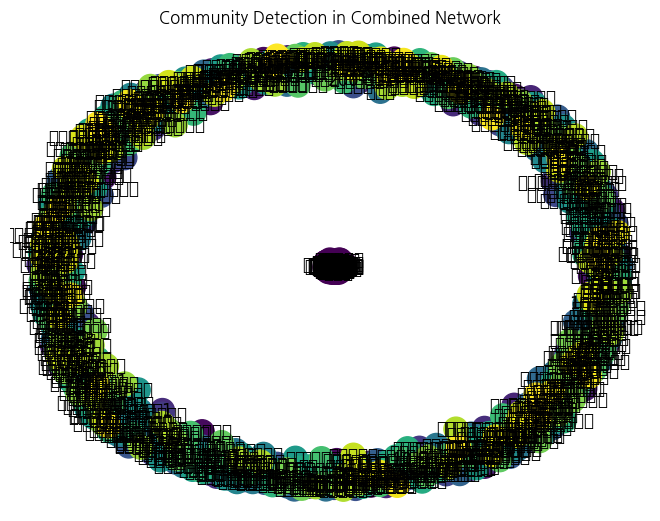

In [ ]:

# 네트워크 시각화
pos = nx.spring_layout(network)
node_colors = []

for node in network.nodes:
    for i, com in enumerate(communities):
        if node in com:
            node_colors.append(i)
            break

nx.draw(network, pos, node_color=node_colors, cmap=plt.cm.get_cmap("viridis", len(communities)), with_labels=True, node_size=300)
plt.title("Community Detection in Combined Network")
plt.show()


In [ ]:
betweenness_centralities = nx.betweenness_centrality(network,weight = 'weight')
community_importance = {}

for i, com in enumerate(communities):
    importance = sum([betweenness_centralities[node] for node in com])
    community_importance[i] = importance

# 가장 중요한 커뮤니티 출력
most_important_community = max(community_importance, key=community_importance.get)
print(f"The most important community is: {most_important_community}")

In [ ]:
import networkx as nx
# 위세중심성 계산
betweenness_centralities = nx.betweenness_centrality(network, weight='weight')

# 연결중심성 계산
degree_centralities = nx.degree_centrality(network)

# Eigenvector 중심성 계산
eigenvector_centralities = nx.eigenvector_centrality(network, weight='weight')

# 위세중심성, 연결중심성, Eigenvector 중심성에 대한 가중치 (예시로 모두 0.5로 설정)
weight_betweenness = 0.3
weight_degree = 0.3
weight_eigenvector = 0.4

# 앙상블 계산
for i, com in enumerate(communities):
    importance = sum([
        (betweenness_centralities[node] * weight_betweenness) +
        (degree_centralities[node] * weight_degree) +
        (eigenvector_centralities[node] * weight_eigenvector)
        for node in com
    ])
    community_importance[i] = importance

# 가장 중요한 커뮤니티 출력
most_important_community = max(community_importance, key=community_importance.get)
print(f"The most important community is: {most_important_community}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The most important community is: 1


In [ ]:
top_communities = sorted(community_importance, key=community_importance.get, reverse=True)[:2]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_communities

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1, 0]

In [ ]:
most_important_community

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

In [ ]:
page_rank_scores = nx.pagerank(network, weight='weight')

# 중요성 지표 계산
betweenness_scores = nx.betweenness_centrality(network, weight='weight')
closeness_scores = nx.closeness_centrality(network, distance='weight')
eigenvector_scores = nx.eigenvector_centrality(network, weight='weight')
degree_scores = dict(network.degree(weight='weight'))

# 중요성 지표 앙상블
combined_scores = {}
for node in network.nodes():
    combined_scores[node] = (
        0.2 * page_rank_scores[node] +
        0.2 * betweenness_scores[node] +
        0.2 * closeness_scores[node] +
        0.2 * eigenvector_scores[node] +
        0.2 * degree_scores[node]
    )

# 각 커뮤니티 내에서 가장 중요한 키워드 찾기
top_keywords_in_communities = {}
for i, com in enumerate(communities):
    keywords_in_community = [node for node in com if node in combined_scores]
    top_keywords = sorted(keywords_in_community, key=lambda x: combined_scores[x], reverse=True)[:20]
    top_keywords_in_communities[i] = top_keywords

# 결과 출력
for i, keywords in top_keywords_in_communities.items():
    print(f"Community {i}: {keywords}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Community 0: ['정보', '제공', '시스템', '서버', '수신', '금융', '단계', '고객', '거래', '요청', '계좌', '저장', '처리', '사용', '전송', '서비스', '생성', '관리', '이용', '단말']
Community 1: ['상품', '대응', '경우', '수단', '연계', '가입', '입금', '카드', '통신', '소정', '승인', '프로그램', '뱅킹', '매체', '이상', '개설', '운용', '발생', '인터페이스', '구비']
Community 2: ['방식', '비율', '원화', '제한', '매입', '배송', '비중', '추심', '쇼핑', '복지', '도금액', '약국', '건강', '임차', '의약품', '제약사', '진단', '의원', '마이너스', '수준']
Community 3: ['코어', '백업', '패드', '스타일', '자개', '박판', '시트', '미러']
Community 4: ['기타']
Community 5: ['하나']
Community 6: ['자기']
Community 7: ['우리']
Community 8: ['본점']
Community 9: ['기본']
Community 10: ['솔로']
Community 11: ['누구']
Community 12: ['벤트']
Community 13: ['본문']
Community 14: ['본인']
Community 15: ['마지막']


In [ ]:
communities[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


frozenset({'가격',
           '가계',
           '가공',
           '가배',
           '가상',
           '가속도',
           '가입',
           '가정',
           '간소화',
           '간의',
           '간편',
           '감별',
           '감사자',
           '감지',
           '개별화',
           '개설',
           '개수',
           '개시',
           '개인',
           '개인별',
           '객관적',
           '객체',
           '거래',
           '거래서',
           '거래자',
           '거래처',
           '거부',
           '거주',
           '거치',
           '건설',
           '건설사',
           '건축',
           '걸음',
           '검색',
           '검증',
           '검출',
           '게시물',
           '게이트웨이',
           '결권',
           '결재',
           '결제',
           '경로',
           '경매',
           '경보',
           '경영',
           '경조사',
           '계산',
           '계약',
           '계약금',
           '계정',
           '계좌',
           '고정',
           '골동품',
           '공개',
           '공공',
           '공급',
           '공급자',
           '공